## Ablation study: Models
### Dataset
- Ticker: btcusdt-f
- Number of features: 20
- Training: 2021/05/07 - 2021/06/14
- Testing: 2021/06/15 - 2022/05/20
- Dataset is resampled by 100ms, last observation in each 100ms window is used

### Model (regression problem)
- Linear (baseline)
- LightGBM
- Neural

### Naive Simulator
- Assumptions
    - No latency
    - Taker fee = 3 bps, maker fee after rebate = 0 bps
    - Open position cost: taker fee + spread/2
    - Close position cost: none
- Trade on top and bottom 0.005% of model predictions in each 10d test data (~80 trades per day)
- Naive simulator is used to evaluate the model's raw prediction power 

### Simple Simulator
- Assumptions
    - No latency
    - Taker fee = 3 bps, maker fee after rebate = 0 bps
    - Open position cost: taker fee + slippage of 0.5 contract
    - Close position - flipping cost: taker fee + slippage of 0.5 contract
    - Close position - no flipping cost: spread/2
- Trade on 
    - One or multiple thresholds on model predictions
    - Thresholds are fixed from validation data or dynamically calibrated with rolling training

### Evaluation
- All returns are measured in bps

## Result: Linear Model
- Rolling training: previous 10d for training, the next 10d for testing

In [38]:
# Profit report: Naive Simulator

{'n_trades': 26680,
 'winning_prct': '55.787%',
 'avg_profit': 1.8685750371904797,
 'std_profit': 24.473298083698428,
 'avg_winning': 9.153656461360898,
 'avg_losing': -7.323621632642725,
 'max_winning': 1705.5616111192824,
 'max_losing': -809.3113524162969,
 'net_profit': 49853.581992242005,
 'gross_profit': 136243.0227708956,
 'gross_loss': -86389.44077865359,
 'profit_factor': 1.5770795775837523,
 'max_consecutive_winning': 338,
 'max_consecutive_losing': 209,
 'max_drawdown_prct': '14.164%',
 'initial_captial': 10000,
 'total_commission': 80040,
 'annualized_return_prct': '535.193%',
 'sharpe ratio': 12.921648681229756}

In [39]:
# Profit report: Simple Simulator

{'n_trades': 10977,
 'winning_prct': '42.452%',
 'avg_profit': -3.3877935001300856,
 'std_profit': 28.229895916490467,
 'avg_winning': 10.267828402007861,
 'avg_losing': -13.461435745493837,
 'max_winning': 918.6487673695398,
 'max_losing': -1029.6700262916893,
 'net_profit': -37187.80925092794,
 'gross_profit': 47848.080353356636,
 'gross_loss': -85035.88960428457,
 'profit_factor': 0.5626810112297077,
 'max_consecutive_winning': 14,
 'max_consecutive_losing': 78,
 'max_drawdown_prct': '292.121%',
 'initial_captial': 10000,
 'total_commission': 32931,
 'annualized_return_prct': '-399.222%',
 'sharpe ratio': -13.02736134006215}

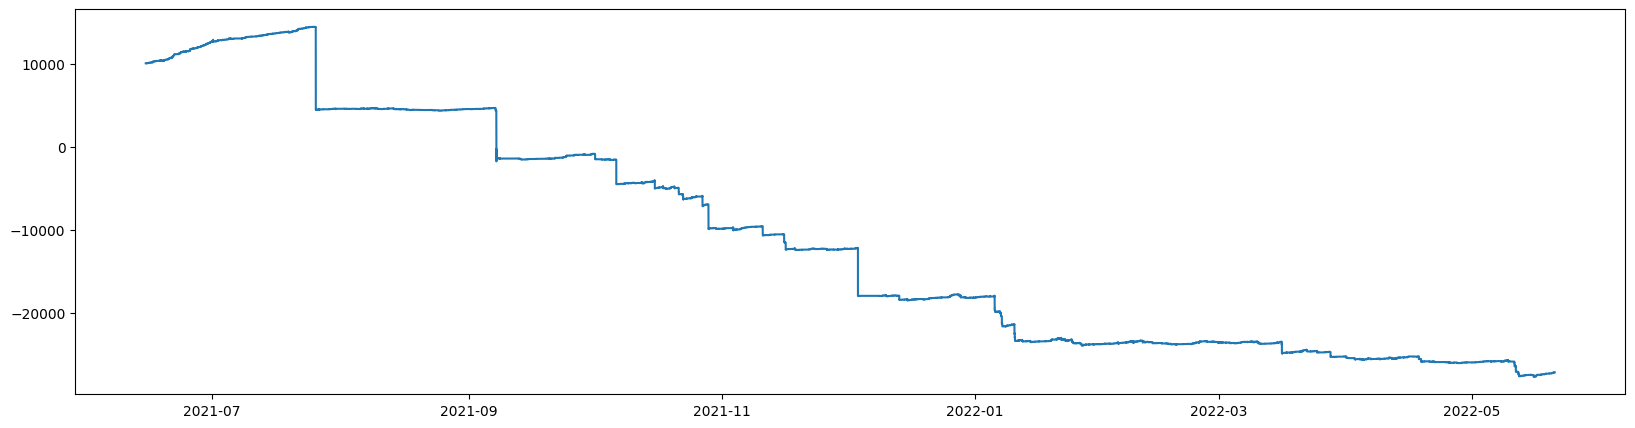

In [40]:
# PnL: Simple Simulator

## Result: LightGBM Model
- Rolling training: previous 30d for training, the next 10d for testing

In [9]:
# Profit report: Naive Simulator

{'n_trades': 26581,
 'winning_prct': '63.154%',
 'avg_profit': 2.210186143110685,
 'std_profit': 18.766968448623288,
 'avg_winning': 6.436276354320446,
 'avg_losing': -5.033368724724548,
 'max_winning': 1705.5616111192824,
 'max_losing': -505.181717757525,
 'net_profit': 58748.95787002511,
 'gross_profit': 108045.77115997733,
 'gross_loss': -49296.813289952224,
 'profit_factor': 2.1917394644655346,
 'max_consecutive_winning': 60,
 'max_consecutive_losing': 15,
 'max_drawdown_prct': '7.807%',
 'initial_captial': 10000,
 'total_commission': 79743,
 'annualized_return_prct': '630.687%',
 'sharpe ratio': 19.894240295398546}

In [10]:
# Profit report: Simple Simulator

{'n_trades': 25865,
 'winning_prct': '61.45%',
 'avg_profit': 1.3200124969447413,
 'std_profit': 11.328619102487751,
 'avg_winning': 5.697270626317475,
 'avg_losing': -5.657436175029003,
 'max_winning': 660.3353986188665,
 'max_losing': -253.70783297593835,
 'net_profit': 34142.123233475744,
 'gross_profit': 90552.41933468994,
 'gross_loss': -56410.2961012142,
 'profit_factor': 1.6052463041891543,
 'max_consecutive_winning': 47,
 'max_consecutive_losing': 26,
 'max_drawdown_prct': '12.692%',
 'initial_captial': 10000,
 'total_commission': 77595,
 'annualized_return_prct': '366.526%',
 'sharpe ratio': 19.416202060444046}

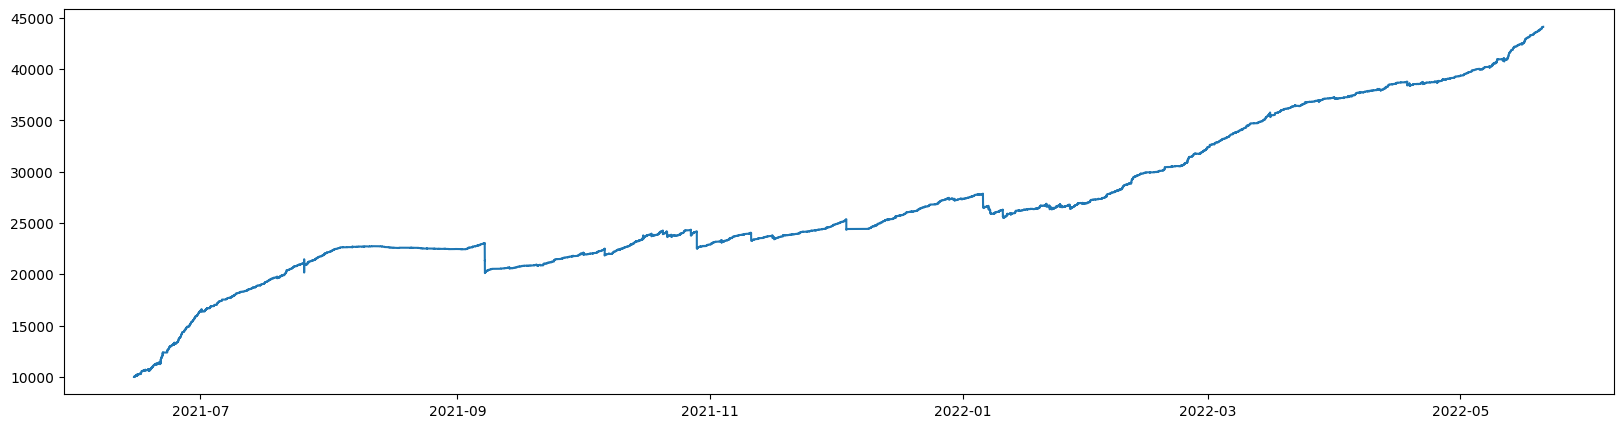

In [8]:
# PnL: Simple Simulator

## Result: Neural Model
- Training: Train on 2021/05/07 - 2021/06/14, evaluate on the rest of data

In [6]:
# Profit report: Naive Simulator

{'n_trades': 26656,
 'winning_prct': '56.423%',
 'avg_profit': 1.8887277656075243,
 'std_profit': 23.577782671999515,
 'avg_winning': 10.12533975152174,
 'avg_losing': -8.775756072903969,
 'max_winning': 1343.800160149085,
 'max_losing': -1701.0355991488618,
 'net_profit': 50345.92732003446,
 'gross_profit': 152285.1098628866,
 'gross_loss': -101939.18254285214,
 'profit_factor': 1.493881999680256,
 'max_consecutive_winning': 169,
 'max_consecutive_losing': 52,
 'max_drawdown_prct': '21.926%',
 'initial_captial': 10000,
 'total_commission': 79968,
 'annualized_return_prct': '540.478%',
 'sharpe ratio': 13.55098511055486}

In [7]:
# Profit report: Simple Simulator

{'n_trades': 19231,
 'winning_prct': '60.673%',
 'avg_profit': 2.6793238199617444,
 'std_profit': 16.19602812696194,
 'avg_winning': 9.444427537140959,
 'avg_losing': -7.757702515096768,
 'max_winning': 855.1962824691809,
 'max_losing': -752.8629869151646,
 'net_profit': 51526.07638168417,
 'gross_profit': 110197.58050336092,
 'gross_loss': -58671.50412167675,
 'profit_factor': 1.8782129783962258,
 'max_consecutive_winning': 31,
 'max_consecutive_losing': 18,
 'max_drawdown_prct': '11.935%',
 'initial_captial': 10000,
 'total_commission': 57693,
 'annualized_return_prct': '553.148%',
 'sharpe ratio': 23.769748708307976}

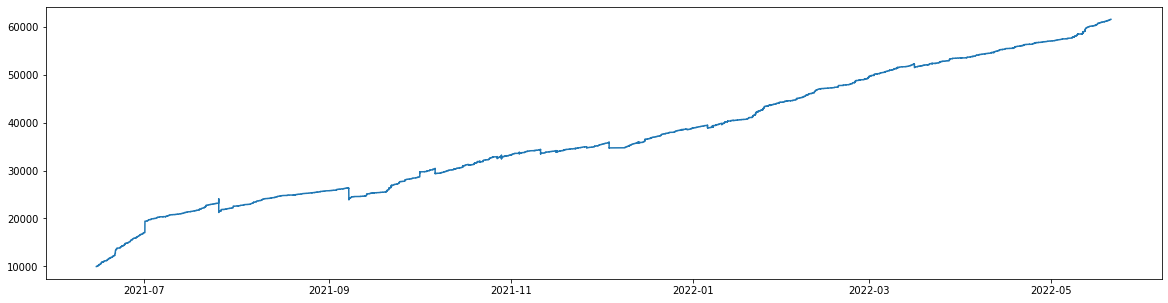

In [8]:
# PnL: Simple Simulator